# Sample Size - How much data is enough for your experiment?

## 0 - Setup

In [1]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
# Load custom functions
from sample_size_functions import *

<div class="alert alert-block alert-info">

*Setting*:

- We know you're a neuroscientist, so you're used to making sense of complicated data.
- We'll consider here some non-neural data.
- We'll apply a standard analysis approach, to produce nonsense.
- We'll then explore powerful yet simple tools to diagnose and untangle this nonsense & produce a meaningful result.

</div>

## 1 - Just Google it?

- You are studying a proposed genetic biomarker for longevity, substance $x$.
- People have a normal distribution of expression of substance $x$.
- Your hypothesis is that individuals at the high end of expression levels tend to live about 5 years longer than people at the low end.

<div class="alert alert-block alert-success">

**Q:** How many individuals do you need to observe to have a reasonable chance of demonstrating this hypothesis is correct? (I.e., What is the **sample size**?)

**A:**

</div>

## 2- Underpowered experiments are doomed to failure.

Now that you've deteremined the sample size for your experiment, let's do it.

In [2]:
N = 100
x,lifespan = load_data(N)

For the `N` samples of data, you receive from each individual:

* `x` - a measure of the proposed biomarker for longevitiy

* `lifespan` - the geographic location (latitude and longitude) of the community,

Let's start by plotting the data.

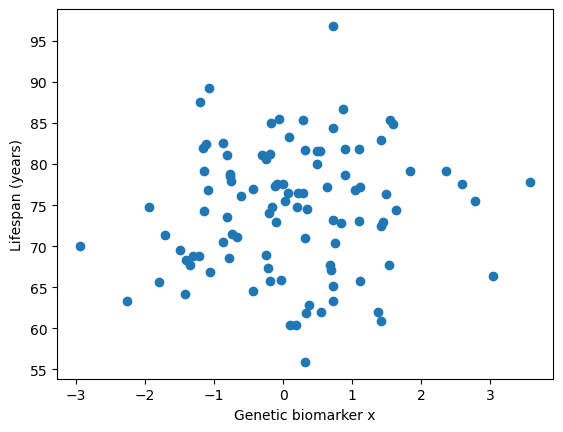

In [3]:
plt.scatter(x,lifespan)
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');

<div class="alert alert-block alert-success">

**Q:** What do you observe?

**A:**

</div>

To assess the relationship between the biomarker `x` and `lifespan`, let's fit a line to the data and compute the slope.

In [4]:
# Estimate a line from the data.

from statsmodels.formula.api import ols

dat                = {"x": x, "lifespan": lifespan}
regression_results = ols("lifespan ~ 1 + x", data=dat).fit()

<div class="alert alert-block alert-success">

**Q:** Can you see the equation for the line in the code above?

**A:**
    
</div>

Now, with the line estimated, let's print the estimated slope and its p-value.

In [5]:
print('Slope estimate =',regression_results.params[1])
print('p-value        =',regression_results.pvalues[1])

Slope estimate = 0.6044566618478564
p-value        = 0.3626426888619829


Let's also **visualize** the estimated line by plotting it with the data.

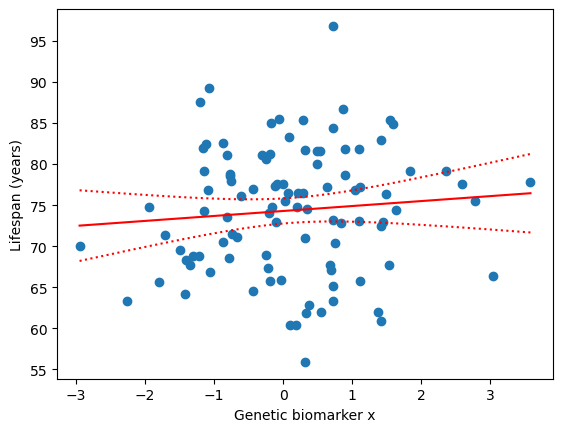

In [6]:
pred   = regression_results.get_prediction().summary_frame()
mn     = pred['mean']
ci_low = pred['mean_ci_lower'] 
ci_upp = pred['mean_ci_upper']

# And plot it.
indices_sorted = np.argsort(x,0)
plt.scatter(x,lifespan)
plt.plot(x[indices_sorted[:,0]],mn[indices_sorted[:,0]], 'r')
plt.plot(x[indices_sorted[:,0]],ci_low[indices_sorted[:,0]], ':r')
plt.plot(x[indices_sorted[:,0]],ci_upp[indices_sorted[:,0]], ':r')
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');

<div class="alert alert-block alert-success">

**Q:** Do you find a significant relationship between the genertic biomarker `x` and `lifespan`?

**A:**

</div>

<div class="alert alert-block alert-danger">
Something has gone wrong ...

</p>

We've applied a standard approach to compute sample size and performed the experiment using this sample size.

We see a trend supporting the hypothesized relationship, but it's not significant.

What's going on?
</div>

<div class="alert alert-block alert-info">

*Moment of tension*:

- Hook the learner - "something isn't right and I want to know why."

</div>

## 3- What is the effect size?

The data in Mini 2 failed to support the hypothesis, but are still useful.

We can use these data to compute the **effect size**.

<div class="alert alert-block alert-success">

**Q:** What is the effect size for the data you analyzed?
- What is the numerical value?
- What does it mean in words?
- Is it consistent with your hypothesis?

**A:**

</div>

<div class="alert alert-block alert-success">

**Q:** Imagine you repeated the experiment. What would you expect for the effect size?

**A:**

</div>

## 4- With resampling you can repeat any experiment.


- The data provided in Mini 2 represent one instantiation of the experiment.
- Maybe we were unlucky and repeating the experiment with sample size `N` would produce significant results.
- But, repeating the experiment is expensive.
- An alternative is to resample your data in hand.

Let’s do that (with fixed sample size `N`) and examine variability in your effect size. 

To do so, we'll first generate a list of indices that we'll use to resample our data.

In [7]:
ind = np.random.choice(np.size(x), np.size(x))

<div class="alert alert-block alert-success">

**Q:** Look at the values in `ind`. Do they make sense?

**A:**

</div>

Now, generate the resampled data

In [8]:
x_resampled = x[ind]
lifespan_resampled = lifespan[ind]

And fit the linear model to compute the slope and significance.

In [9]:
dat                = {"x": x_resampled, "lifespan": lifespan_resampled}
regression_results = ols("lifespan ~ 1 + x", data=dat).fit()

print('Slope estimate =',regression_results.params[1])
print('p-value        =',regression_results.pvalues[1])

Slope estimate = 0.26807570534880815
p-value        = 0.6984781830900246


<div class="alert alert-block alert-success">

**Q:** Repeat these steps to generate results from multiple "experiments". Do you ever find a significant result? What p-values do you find?

**A:**

</div>

<div class="alert alert-block alert-info">

*Conclusion*:

- Using the sample size `N` and resampling the data we get qualitatively similar - but quantitatively different - results.
- We do not (or very infrequently) find a significant results.
- The significance (p-value) changes for each resample. 

</div>

## 5- You have the power!  

Resampling provides a direct, computational approach to compute the **power**.

<div class="alert alert-block alert-danger">
Define power.
    
- It's a mysterious parameter in the online calculator.
- What does Power = 0.8 mean?
- What does alpha = 0.05 mean?
</div>

The procedure to compute the power using resampling is simple. Here are the steps in general:

1. Resample the data.
2. Compute the significance of the proposed effect.
3. Repeat 1-2 many times.

The power is the number of times we detect a significant effect, divided by the total number of repetitions.

Let's apply this procedure to our data and effect of interest:

In [10]:
number_of_repetitions = 1000
p_value = np.zeros(number_of_repetitions)
for k in np.arange(number_of_repetitions):
    ind = np.random.choice(np.size(x), np.size(x))
    x_resampled = x[ind]
    lifespan_resampled = lifespan[ind]
    dat                = {"x": x_resampled, "lifespan": lifespan_resampled}
    regression_results = ols("lifespan ~ 1 + x", data=dat).fit()
    p_value[k] = regression_results.pvalues[1]

<div class="alert alert-block alert-success">

**Q:** Does the code above make sense? Can you see the data resampled, and the estimated model?

**A:**

</div>

Now, compute the power

In [11]:
Power = np.sum(p_value < 0.05)/number_of_repetitions
print(Power)

0.115


<div class="alert alert-block alert-success">

**Q:** What value do you find for `Power`?

- Interpert this value.
- Do you have enough data to detect the effect?

**A:**

</div>

## 6- You have the sample size!

- In Unit 5, we used resampling with a fixed sample size to compute the power.
- We can use the same resampling approach to compute the sample size for a fixed power.

<div class="alert alert-block alert-danger">
Provide some intuition for this calculation.
</div>

Let's do it!

In [12]:
N_resampled = 800;
number_of_repetitions = 1000
p_value = np.zeros(number_of_repetitions)
for k in np.arange(number_of_repetitions):
    ind = np.random.choice(np.size(x), N_resampled)
    x_resampled = x[ind]
    lifespan_resampled = lifespan[ind]
    dat                = {"x": x_resampled, "lifespan": lifespan_resampled}
    regression_results = ols("lifespan ~ 1 + x", data=dat).fit()
    p_value[k] = regression_results.pvalues[1]
Power = np.sum(p_value < 0.05)/number_of_repetitions
print('N=',N_resampled,'Power=',Power)

N= 800 Power= 0.771


<div class="alert alert-block alert-success">

**Q:** How does increasing the sample size `N_resampled` impact the power?

**A:**

</div>

<div class="alert alert-block alert-success">

**Q:** At what value of `N_resampled` is the power just above 0.8?

- How does this compare to the results from your online calculator?

**A:**

</div>

## 7- Well powered experiments can provide strong evidence

- We used two approaches to calculate the sample size: 1) online calculator, 2) resampling
- We found that resampling suggests a much larger sample size.
- Let’s now “collect new data” and see if we detect a significant effect.

Let's begin by collecting the new data, now using the sample size you found through resampling.

In [13]:
N = 800
x,lifespan = load_data(N)

Let's plot it.

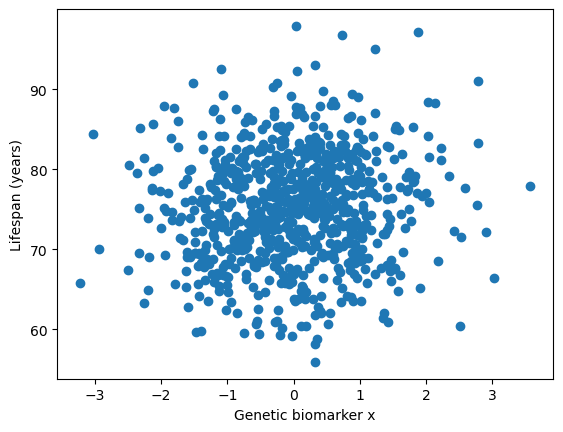

In [14]:
plt.scatter(x,lifespan)
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');

<div class="alert alert-block alert-success">

**Q:** Compare the plot of these new data (with `N=800`) to the plot of the original data. How are the plots similar or different?

- Do you see the same trend in both plots?

**A:**

</div>

Now, let's test our hypothesis.

In [15]:
from statsmodels.formula.api import ols

dat                = {"x": x, "lifespan": lifespan}
regression_results = ols("lifespan ~ 1 + x", data=dat).fit()
print('Slope estimate =',regression_results.params[1])
print('p-value        =',regression_results.pvalues[1])

Slope estimate = 0.5688811960348886
p-value        = 0.01778690504184947


<div class="alert alert-block alert-success">

**Q:** What is the effect size and significance?

- How do these results compare to the original data set?

**A:**

</div>

Let's also **visualize** the estimated line by plotting it with the data.

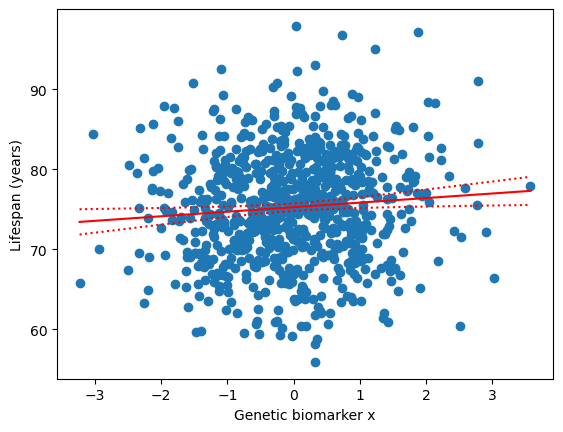

In [16]:
pred   = regression_results.get_prediction().summary_frame()
mn     = pred['mean']
ci_low = pred['mean_ci_lower'] 
ci_upp = pred['mean_ci_upper']

# And plot it.
indices_sorted = np.argsort(x,0)
plt.scatter(x,lifespan)
plt.plot(x[indices_sorted[:,0]],mn[indices_sorted[:,0]], 'r')
plt.plot(x[indices_sorted[:,0]],ci_low[indices_sorted[:,0]], ':r')
plt.plot(x[indices_sorted[:,0]],ci_upp[indices_sorted[:,0]], ':r')
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');

<div class="alert alert-block alert-success">

**Q:** How do these results compare to the original data set?

**A:**

</div>

<div class="alert alert-block alert-success">

**Q:** What do you conclude about the relationship between the genetic biomarker `x` and `lifespan`?

**A:**

</div>

<div class="alert alert-block alert-info">

*Conclusion*:

- The resampling procedure allowed us to compute a large enough sample size, so our experiment was sufficiently powered, and we detected a significant effect.


</div>